## Satistics : Sampling and Inferences

https://docs.scipy.org/doc/scipy/reference/stats.html

In [65]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1. T-test 

- single observation

Calculate the T-test for the mean of ONE group of scores.

This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

- Generate random variates implementing ```scipy.stat.norm.rvs()```.

In [66]:
np.random.seed(7654567)  # fix seed to get the same result
# generate random variates
rvs = stats.norm.rvs(loc=5, scale=10, size=(50,2))
rvs[0:10]

array([[-4.46976756,  2.23747986],
       [ 3.01265677, 19.93519976],
       [ 0.6963815 ,  8.02590763],
       [11.28814222, -8.19430475],
       [-4.06294214,  0.54059758],
       [ 7.49758326, -1.57148818],
       [-1.44414717, 10.18715114],
       [ 4.65777598, -4.79148636],
       [-1.49960303, -4.09743532],
       [ 3.32305696,  4.03947153]])

In [67]:
stats.ttest_1samp(rvs,5.0)

Ttest_1sampResult(statistic=array([-0.68014479, -0.04323899]), pvalue=array([0.49961383, 0.96568674]))

In [68]:
stats.ttest_1samp(rvs,0.0)

Ttest_1sampResult(statistic=array([2.77025808, 4.11038784]), pvalue=array([0.00789095, 0.00014999]))

- Two observation

In [69]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)

stats.ttest_ind(rvs1,rvs2, equal_var = False)


Ttest_indResult(statistic=0.8639967583201787, pvalue=0.38779745253635345)

### 2.  $\chi^{2}$ Test

The chi-square test tests the null hypothesis that the categorical data has the given frequencies.

In [70]:
stats.chisquare([16, 18, 16, 14, 12, 12])

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)

### 3. Binomial Test 

This is an exact, two-sided test of the null hypothesis that the probability of success in a Bernoulli experiment is p.

In [71]:
stats.binom_test(3, n=15, p=0.1, alternative='greater')

0.18406106910639114

### Sampling with Montecarlo

#### 1.  Montecarlo Integration

- Example 1

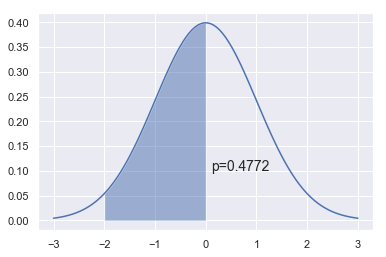

In [72]:
x = np.linspace(-3,3,100)
dist = stats.norm(0,1)
a = -2
b = 0
plt.plot(x, dist.pdf(x))
plt.fill_between(np.linspace(a,b,100), dist.pdf(np.linspace(a,b,100)), alpha=0.5)
plt.text(b+0.1, 0.1, 'p=%.4f' % (dist.cdf(b) - dist.cdf(a)), fontsize=14)
pass

In [73]:
n = 10000
x = stats.norm.rvs(loc=0,scale=1,size=n)

These points are generated randomly. No dependence to each other.

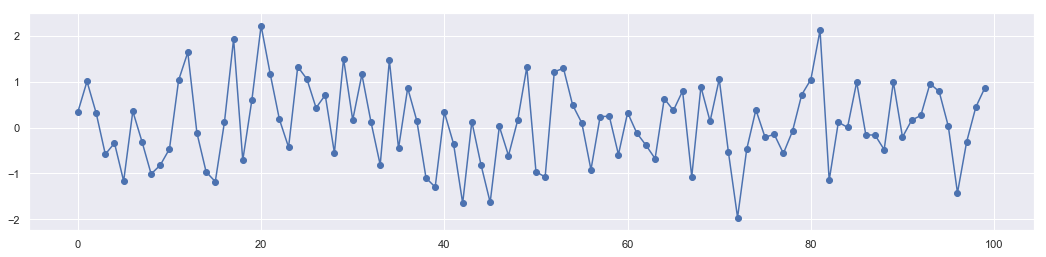

In [74]:
plt.figure(figsize = [18,4])
plt.plot(range(len(x[0:100])),x[0:100])
plt.scatter(range(len(x[0:100])),x[0:100])

In [75]:
np.sum((a < x) & (x < b))/n

0.4777

In [76]:
from scipy.integrate import quad
y, err = quad(dist.pdf, a, b)
y

0.47724986805182085

- Example 2

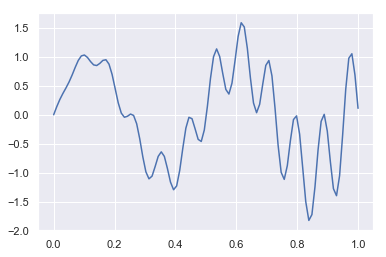

In [77]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
pass

In [78]:
n = int(1e6)
x = f(np.random.random(n))
y = 1.0/n * np.sum(x)
y

0.02062927045589262

In [79]:
y, err = quad(f, 0, 1.0)
y

0.02025493910239419

#### 2. Markov Chain Montecarlo

All MCMC sampling schemes have the following structure:

Start with some state xk

Repeat

- Draw a sample xk+1 from a proposal distribution p(xk)
- Calculate the acceptance probability A(x) - in general, this is a function of the proposal and target distributions at xk and xk+1
- Choose a standard random uniform number r
- If r<A(x) set state to be xk+1, otherwise keep state as xk

In [80]:
n = 10000
xs = np.zeros(n)
x = 0
for i in range(n):
    p = np.random.uniform(x-1, x+1)
    a = np.exp(-(p**2-x**2)/2)
    r = np.random.rand()
    if r < a:
        x = p
    xs[i] = x

These data points create a chain call Markov Chain. The sample generation follows principle of detailed balance.

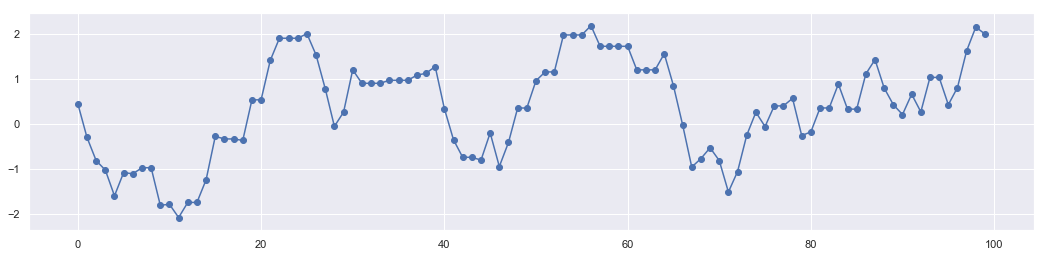

In [81]:
plt.figure(figsize = [18,4])
plt.plot(range(len(xs[0:100])),xs[0:100])
plt.scatter(range(len(xs[0:100])),xs[0:100])

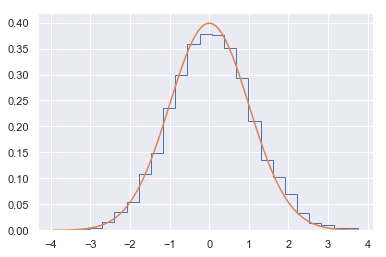

In [82]:
plt.hist(xs, 25, histtype='step', density=True)
xp = np.linspace(xs.min(), xs.max(), 100)
plt.plot(xp, stats.norm().pdf(xp))
pass

#### 3. Gibb's Sampling

Gibbs sampling is a type of random walk through parameter space

μ = [0, 0]

Σ = [[1,ρ],[ρ,1]]

In [83]:
rho = -0.8
niter = 1000
xs = np.zeros((niter, 2))
y = 0
for i in range(niter):
    x = np.random.normal(rho*y, 1-rho**2)
    y = np.random.normal(rho*x, 1-rho**2)
    xs[i,:] = x,y

In [84]:
dist = stats.multivariate_normal([0,0], np.array([[1,rho],[rho,1]]))

x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-3.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

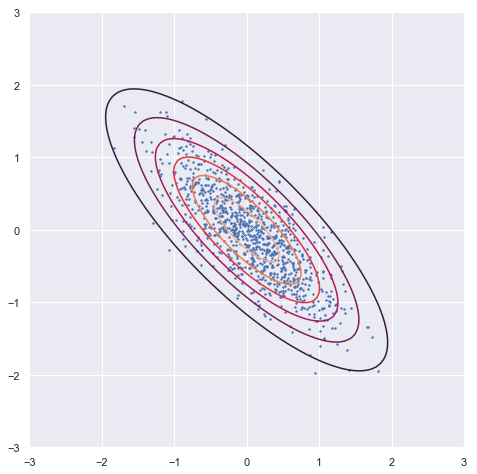

In [86]:
plt.figure(figsize = [8,8])
plt.contour(X, Y, Z)
plt.scatter(xs[:, 0], xs[:, 1], s=2)
plt.axis('square')
pass

#### 4. [Metropolice Hasting](https://wiseodd.github.io/techblog/2015/10/17/metropolis-hastings/)

In [111]:
def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2


def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)

In [112]:
def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        
        frac = p(x_star, y_star) / p(x, y)
        
        if np.random.rand() < frac:
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples

In [113]:
mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])

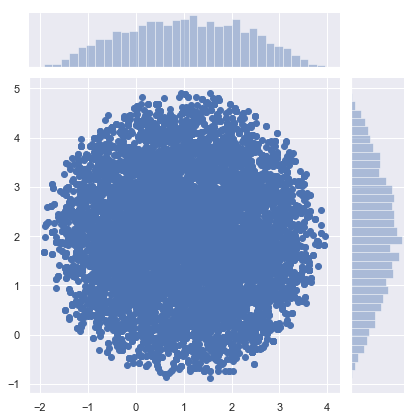

In [114]:
samples = metropolis_hastings(circle, iter=10000)
sns.jointplot(samples[:, 0], samples[:, 1])

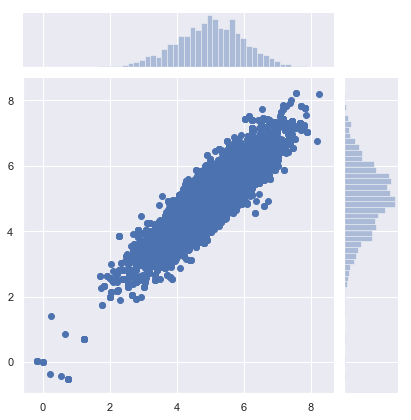

In [115]:
samples = metropolis_hastings(pgauss, iter=10000)
sns.jointplot(samples[:, 0], samples[:, 1])

#### 5. Hamiltonian Monte Carlo (HMC) or Hybrid Montecarlo 

In [101]:
def leapfrog(A, u, N):
    orbit = np.zeros((N,2))

    dt = 2*np.pi/N
    for i in range(N):
        u[1] = u[1] + dt/2 * A[1] @ u
        u[0] = u[0] + dt * A[0] @ u
        u[1] = u[1] + dt/2 * A[1] @ u
        orbit[i] = u
    return orbit

In [102]:
A = np.array([[0,1],[-1,0]])
u = np.array([1.0,0.0])
N = 64

- Plot the orbit

In [103]:
orbit = leapfrog(A, u, N)

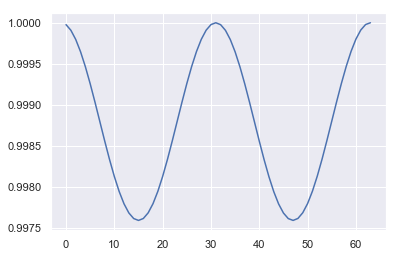

In [104]:
plt.plot([p @ p for p in orbit])
pass

- Conservation of energy

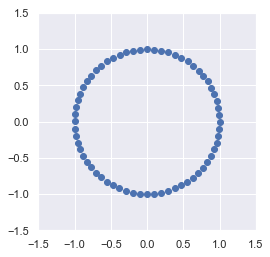

In [105]:
ax = plt.subplot(111)
plt.plot(orbit[:, 0], orbit[:,1], 'o')
ax.axis('square')
plt.axis([-1.5, 1.5, -1.5, 1.5])
pass

- Trget distribution

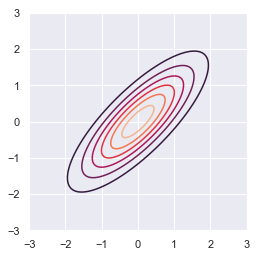

In [91]:
sigma = np.array([[1,0.8],[0.8,1]])
mu = np.zeros(2)

dist = stats.multivariate_normal(mu, sigma)

x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-3.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

plt.contour(X, Y, Z)
plt.axis('square')
pass

- Hybrid Montecarlo (HMC)

In [92]:
def E(A, u0, v0, u, v):
    """Total energy."""
    return (u0 @ tau @ u0 + v0 @ v0) - (u @ tau@u + v @ v)

In [93]:
def leapfrog(A, u, v, h, N):
    """Leapfrog finite difference scheme."""
    v = v - h/2 * A @ u
    for i in range(N-1):
        u = u + h * v
        v = v - h * A @ u

    u = u + h * v
    v = v - h/2 * A @ u

    return u, v

In [97]:
import numpy.linalg as la
niter = 10000
h = 0.01
N = 100

A = np.array([[0,1],[-1,0]])

tau = la.inv(sigma)

orbit = np.zeros((niter+1, 2))
u = np.array([-2,2])
orbit[0] = u
for k in range(niter):
    v0 = np.random.normal(0,1,2)
    u, v = leapfrog(tau, u, v0, h, N)

    # accept-reject
    u0 = orbit[k]
    a = np.exp(E(A, u0, v0, u, v))
    r = np.random.rand()

    if r < a:
        orbit[k+1] = u
    else:
        orbit[k+1] = u0

- simulated samples

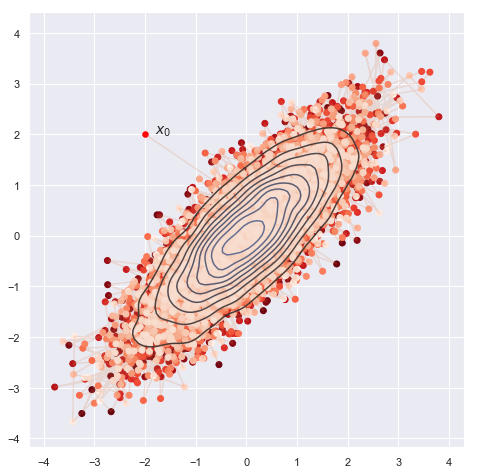

In [99]:
plt.figure(figsize = [10,8])
sns.kdeplot(orbit[:, 0], orbit[:, 1])
plt.plot(orbit[:,0], orbit[:,1], alpha=0.2)
plt.scatter(orbit[:1,0], orbit[:1,1],  c='red', s=30)
plt.scatter(orbit[1:,0], orbit[1:,1],  c=np.arange(niter)[::-1], cmap='Reds')
plt.text(-1.8,2,'$x_0$', fontsize=14)
plt.axis('square')
pass